### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
# Importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [108]:
# Loading the data
(train_images, train_labels),  (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [110]:
train_images_gray = tf.image.rgb_to_grayscale(train_images).numpy()
test_images_gray = tf.image.rgb_to_grayscale(test_images).numpy()

train_images_gray = train_images_gray.reshape(50000, 32, 32)
print(train_images_gray.shape)
test_images_gray = test_images_gray.reshape(10000, 32, 32)
print(test_images_gray.shape)

In [111]:
# Normalize data
train_images_gray_norm = train_images_gray / 255
test_images_gray_norm = test_images_gray / 255

In [112]:
# Shape of the data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [113]:
# Shape of the data
print(train_images_gray_norm.shape)
print(train_labels.shape)
print(test_images_gray_norm.shape)
print(test_labels.shape)

(50000, 32, 32, 1)
(50000, 1)
(10000, 32, 32, 1)
(10000, 1)


In [95]:
# Shape of the grayscale images
print(train_images_gray.shape)
print(test_images_gray.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


Text(0.5, 1.0, 'Label: [6]')

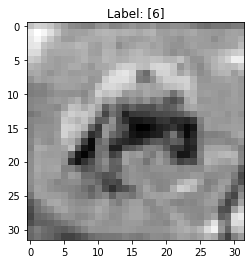

In [97]:
# Observing a sample
plt.imshow(train_images_gray_norm[0].reshape(32,32), cmap=plt.cm.binary)
plt.title('Label: ' + str(train_labels[0]))

# Model 1

In [138]:
# Creating a model and layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=16, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3, 3)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                200736    
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [141]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [140]:
history = model.fit(train_images_gray_norm, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3162 - accuracy: 0.0988
Epoch 2/25
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3037 - accuracy: 0.1021
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3040 - accuracy: 0.1003
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3038 - accuracy: 0.1027
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3039 - accuracy: 0.0990
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3038 - accuracy: 0.0988
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3040 - accuracy: 0.0987
Epoch 8/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3041 - accuracy: 0.0975
Epoch 9/25
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3040 - accuracy: 0.1011
Epoch 10/25
1563/1563 [==============================] - 9s 6ms/step - los

In [117]:
predictions1 = model.predict(test_images_gray)

In [15]:
predictions1.shape

(10000, 10)

In [16]:
results1 = model.evaluate(test_images_gray, test_labels)
print("test loss, test acc:", results1)

313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1000
test loss, test acc: [2.3026206493377686, 0.10000000149011612]


# Model 2

In [20]:
# Creating a model and layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [21]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images_gray, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 18s 11ms/step - loss: 3.1748 - accuracy: 0.1024
Epoch 2/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 3/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.1007
Epoch 5/25
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3042 - accuracy: 0.0996
Epoch 6/25
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3029 - accuracy: 0.0955
Epoch 7/25
1563/1563 [==============================] - 15s 9ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 8/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.0975
Epoch 9/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3027 - accuracy: 0.1006
Epoch 10/25
1563/1563 [==============================] - 17s 11ms

In [23]:
predictions2 = model.predict(test_images_gray)

In [24]:
predictions2.shape

(10000, 10)

In [25]:
results2 = model.evaluate(test_images_gray, test_labels)
print("test loss, test acc:", results2)

313/313 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1000
test loss, test acc: [2.3026392459869385, 0.10000000149011612]


### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [26]:
# Creating a model and layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 27s 17ms/step - loss: 3.9076 - accuracy: 0.1013
Epoch 2/25
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3029 - accuracy: 0.1010
Epoch 3/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3028 - accuracy: 0.0998
Epoch 4/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 5/25
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 6/25
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.1003
Epoch 7/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0991
Epoch 8/25
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 9/25
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3027 - accuracy: 0.1016
Epoch 10/25
1563/1563 [==============================] - 22s 14m

In [29]:
predictions3 = model.predict(test_images)

In [30]:
predictions3.shape

(10000, 10)

In [31]:
results3 = model.evaluate(test_images, test_labels)
print("test loss, test acc:", results3)

313/313 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.1000
test loss, test acc: [2.302672863006592, 0.10000000149011612]


Model 1 on the grayscale images had an accuracy of 10%. Model 2 on the grayscale images also had an accuracy of 10%. Model 1 on the RGB images also had an accuracy of 10%. This shows that neither model is trained properly for either the grayscale images or the RGB images. Perhaps the model needs a lot more epochs than 25 for each model fitting, but I don't have the time right now :)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])